In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
import seaborn as sns

In [2]:
def extend_dataframe(olddf, vals, metric, name):
    new = pd.DataFrame()
    new["Value"] = vals
    new["Metric"] = metric
    new["Model"] = name
    olddf = olddf.append(new)
    return olddf

In [ ]:
newdf = pd.DataFrame(columns=["Value", "Metric", "Model"])

labels = [
    "RFC:Scaffold",
    "SVM:Scaffold",
    "FFN:Scaffold",
    "dummy1",
    "ChemBERTa:Random",
    "ChemBERTa:Scaffold",
    "dummy2",
    "AttentiveFP:Random",
    "AttentiveFP:Scaffold",
    "dummy3",
    "D-MPNN:Random",
    "D-MPNN:Scaffold",
]

# paths since they are all in different folders
rfc_path = "rfc_hyperopt_pk_37k/rfc_final_122/"
svm_path = "svm_hyperopt_pk_37k/svm_final_15/"
ffn_path = "ffn_hyperopt_pk_37k/ffn_final_20/"
chemb_prefix = "chemberta_pk_37k/"
chemb_rand_path = chemb_prefix + "random_split_chemberta_models/"
chemb_scaff_path = chemb_prefix + "scaffold_split_chemberta_models/"
attent_prefix = "attentivefp_pk_37k/"
attent_rand_path = attent_prefix + "random_split_attentivefp_models/"
attent_scaff_path = attent_prefix + "scaffold_split_attentivefp_models/"
gnn_prefix = "pk_37k_screen_models_03192022/"
# gnn_rand_path = gnn_prefix+'FINALbayHO04052022/'
gnn_rand_path = (
    gnn_prefix + "FINALbayHO04052022_30_models_no_scaffold_split/"
)  # 30 individual folds for fairer comparison
# gnn_scaff_path = gnn_prefix+'FINALbayHO04052022_with_scaffold_split/'
gnn_scaff_path = (
    gnn_prefix + "FINALbayHO04052022_30_models_with_scaffold_split/"
)  # 30 individual folds for fairer comparison
for fold, name in zip(
    [
        rfc_path,
        svm_path,
        ffn_path,
        "",
        chemb_rand_path,
        chemb_scaff_path,
        "",
        attent_rand_path,
        attent_scaff_path,
        "",
        gnn_rand_path,
        gnn_scaff_path,
    ],
    labels,
):
    if "dummy" in name:
        newdf = extend_dataframe(newdf, [-0.1], "auPR", name)  # empty
        newdf = extend_dataframe(newdf, [-0.1], "auROC", name)

    elif "ChemBERTa" in name or "AttentiveFP" in name:
        df = pd.read_csv("../models/other_models/" + fold + "summary_results.csv")
        newdf = extend_dataframe(newdf, list(df["auPR"]), "auPR", name)  # 20 folds
        newdf = extend_dataframe(newdf, list(df["auROC"]), "auROC", name)

    else:
        if "D-MPNN" not in name:
            df = pd.read_csv("../models/other_models/" + fold + "test_scores.csv")
        else:
            df = pd.read_csv("../models/" + fold + "test_scores.csv")
        newdf = extend_dataframe(
            newdf, list(df.iloc[0, 3:33]), "auPR", name
        )  # 30 folds
        newdf = extend_dataframe(newdf, list(df.iloc[0, 35:65]), "auROC", name)

    # previously needed this for the case where D-MPNN had 5 folds of 10 ensemble models each
    # now retrain with 30 individual folds like RFC, SVM, FFN
    # else:
    #     print(name)
    #     df = pd.read_csv('../models/' + fold + 'test_scores.csv')
    #     newdf = extend_dataframe(newdf, list(df.iloc[0,3:8]), 'auPR', name) # 5 folds of 10 ensemble models each
    #     newdf = extend_dataframe(newdf, list(df.iloc[0,10:15]), 'auROC', name)

df = newdf
df

/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_46610/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_46610/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_46610/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4xh4q0dw5hz2h0000gn/T/ipykernel_46610/2388758846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  olddf = olddf.append(new)
/var/folders/py/8hwb28r933z4

,Value,Metric,Model
0,0.336715,auPR,RFC:Scaffold
1,0.427412,auPR,RFC:Scaffold
2,0.479889,auPR,RFC:Scaffold
3,0.398663,auPR,RFC:Scaffold
4,0.45406,auPR,RFC:Scaffold
...,...,...,...
25,0.887604,auROC,D-MPNN:Scaffold
26,0.864637,auROC,D-MPNN:Scaffold
27,0.906776,auROC,D-MPNN:Scaffold
28,0.89268,auROC,D-MPNN:Scaffold


In [4]:
# new order so GNN is last
from pandas.api.types import CategoricalDtype

cat_model_order = CategoricalDtype(labels, ordered=True)
df["Model"] = df["Model"].astype(cat_model_order)
df.sort_values("Model")
df

,Value,Metric,Model
0,0.336715,auPR,RFC:Scaffold
1,0.427412,auPR,RFC:Scaffold
2,0.479889,auPR,RFC:Scaffold
3,0.398663,auPR,RFC:Scaffold
4,0.45406,auPR,RFC:Scaffold
...,...,...,...
25,0.887604,auROC,D-MPNN:Scaffold
26,0.864637,auROC,D-MPNN:Scaffold
27,0.906776,auROC,D-MPNN:Scaffold
28,0.89268,auROC,D-MPNN:Scaffold


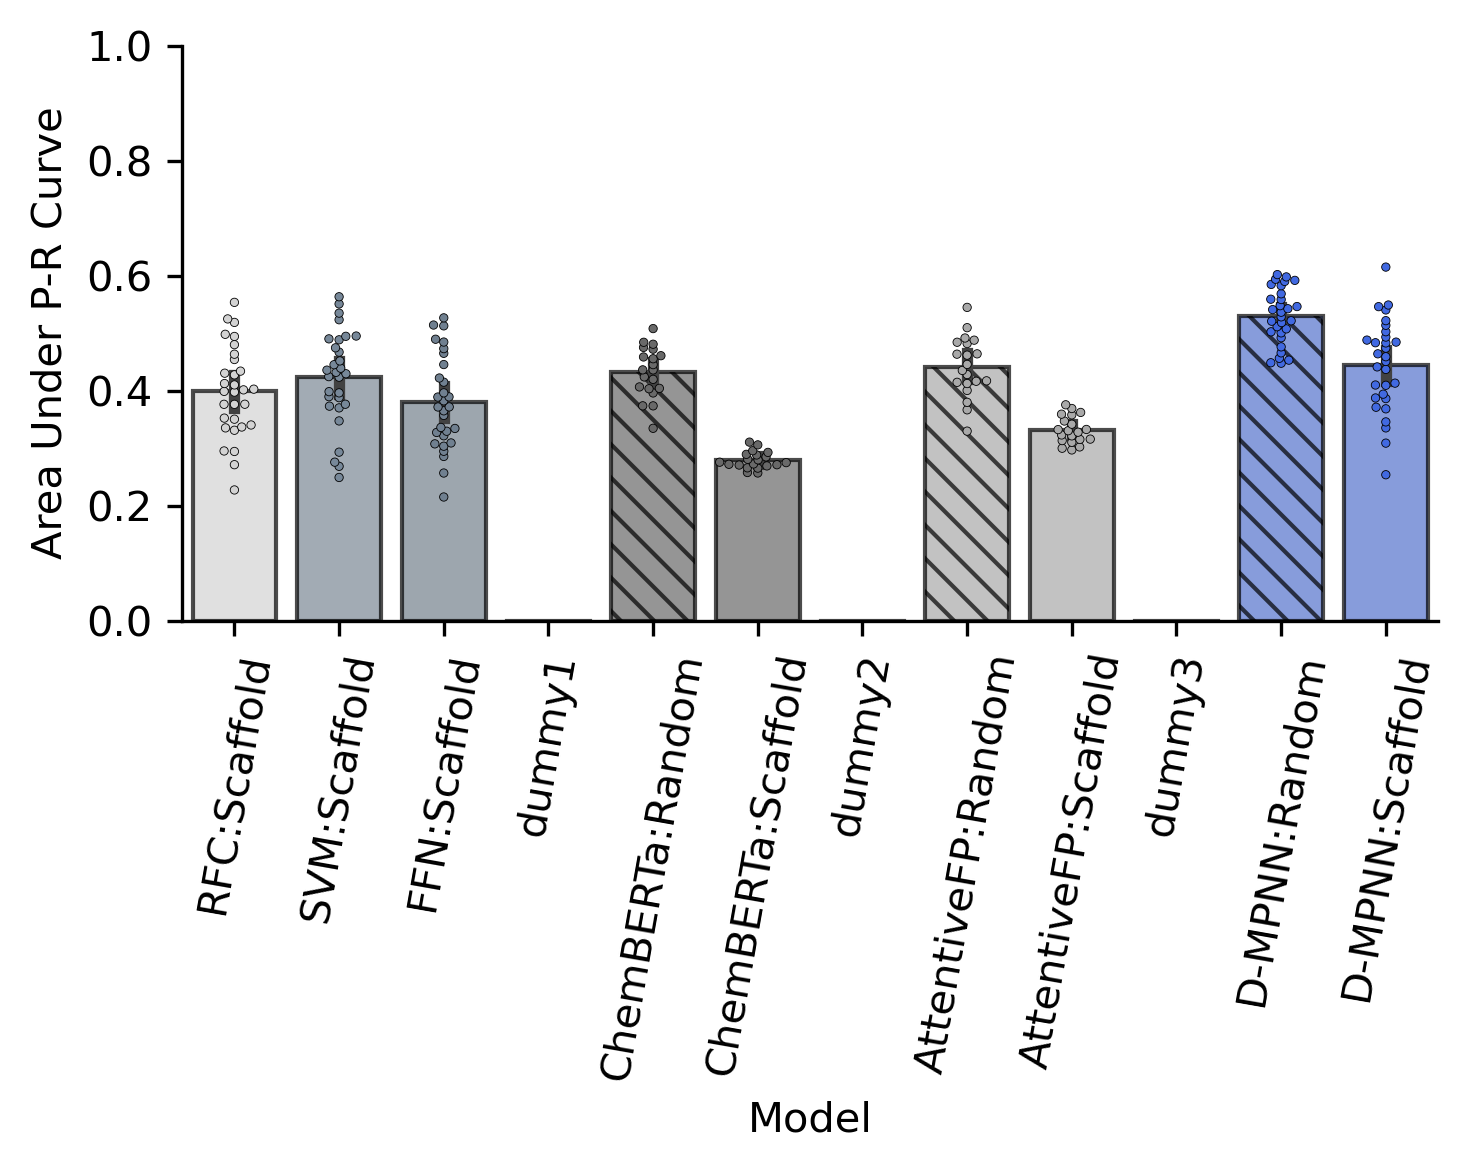

In [ ]:
plt.figure(figsize=(5, 4), dpi=300)
aupr_df = df[df["Metric"] == "auPR"]
my_pal = dict(
    zip(
        labels,
        [
            "lightgrey",
            "lightslategrey",
            "slategrey",
            "white",
            "dimgrey",
            "dimgrey",
            "white",
            "darkgrey",
            "darkgrey",
            "white",
            "royalblue",
            "royalblue",
        ],
    )
)
ax = sns.swarmplot(
    data=aupr_df,
    x="Model",
    y="Value",
    edgecolor="black",
    linewidth=0.2,
    s=2,
    label="",
    palette=my_pal,
)
sns.barplot(
    data=aupr_df,
    x="Model",
    y="Value",
    edgecolor="black",
    linewidth=1,
    alpha=0.7,
    palette=my_pal,
)
handles, labs = ax.get_legend_handles_labels()

# Define some hatches
# Loop over the bars
# weird numbering convention - loops over colors
# https://stackoverflow.com/questions/35467188/is-it-possible-to-add-hatches-to-each-individual-bar-in-seaborn-barplot # noqa: E501
# extend_labels = [x for x in labels for _ in (0, 1)]
# # can use for plotting auPR and auROC in same plot
hatches = [" " if "Scaffold" in x else "\\\\\\" for x in labels]

for i, thisbar in enumerate(ax.patches):
    thisbar.set_hatch(hatches[i])

plt.xlabel("Model")
plt.ylim([0, 1.0])
plt.xticks(rotation=80)
plt.ylabel("Area Under P-R Curve")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()

plt.savefig("../figure_panels/model_comparison_aupr.svg")
plt.savefig("../figure_panels/model_comparison_aupr.png")
plt.show()

/Users/jackie16201/opt/anaconda3/envs/chemprop010821/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jackie16201/opt/anaconda3/envs/chemprop010821/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jackie16201/opt/anaconda3/envs/chemprop010821/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


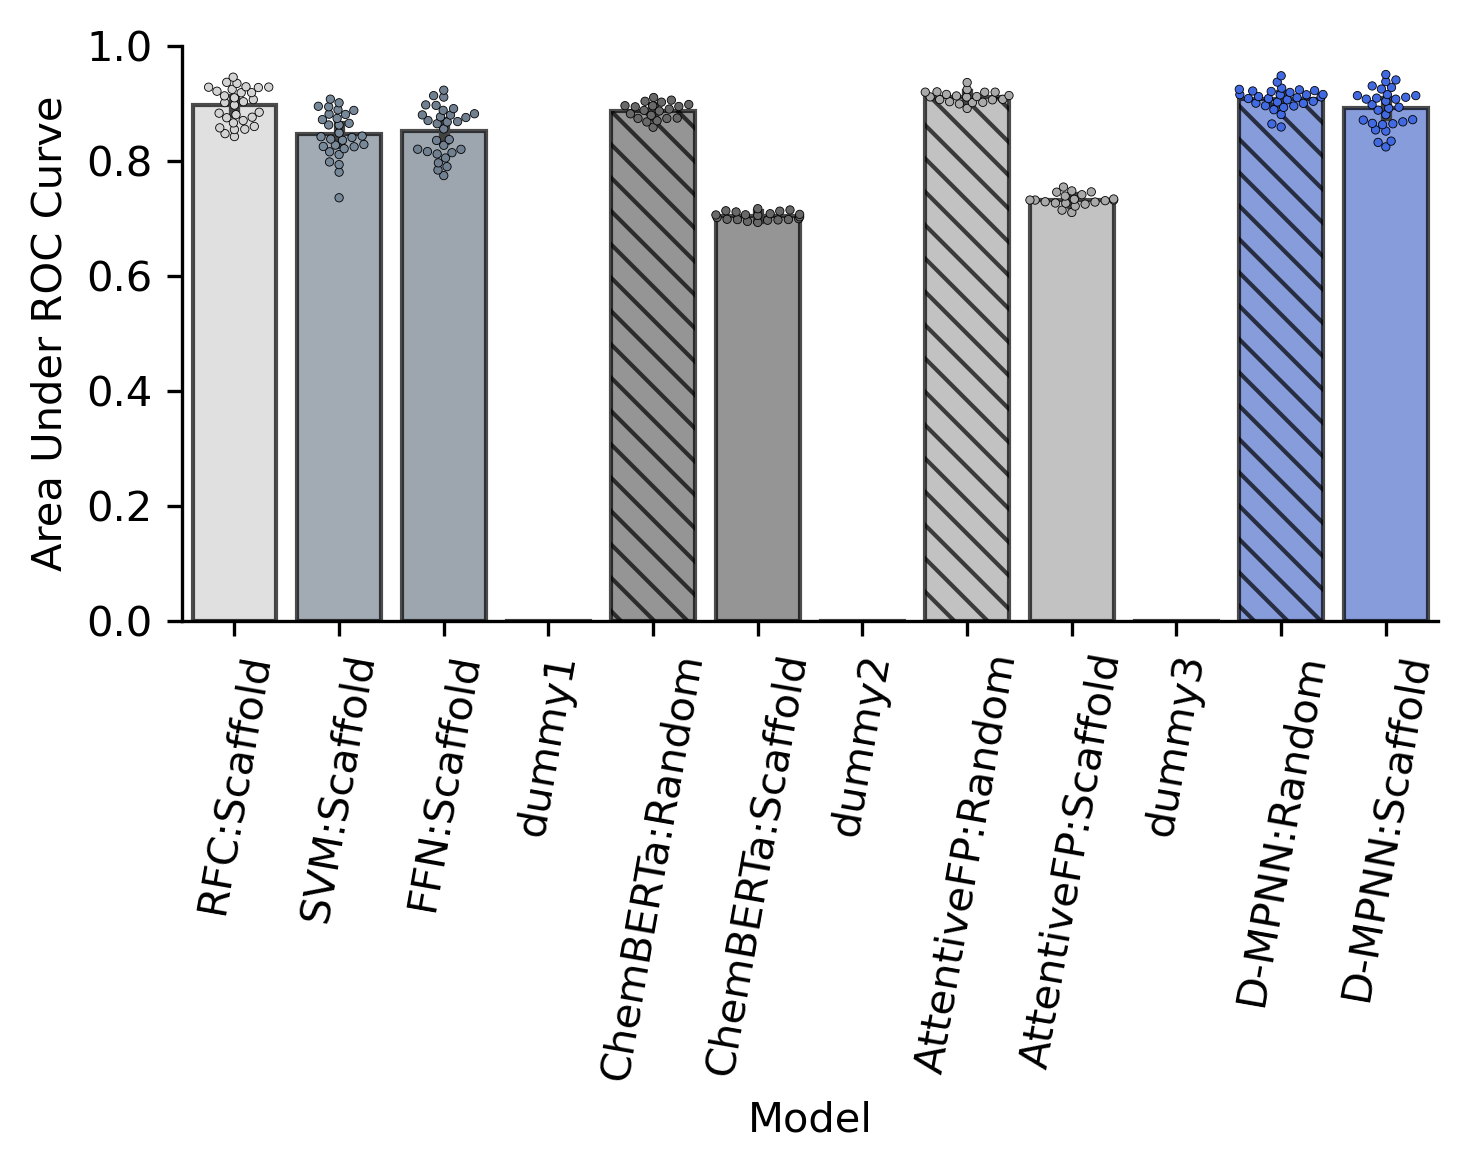

In [ ]:
plt.figure(figsize=(5, 4), dpi=300)
aupr_df = df[df["Metric"] == "auROC"]
my_pal = dict(
    zip(
        labels,
        [
            "lightgrey",
            "lightslategrey",
            "slategrey",
            "white",
            "dimgrey",
            "dimgrey",
            "white",
            "darkgrey",
            "darkgrey",
            "white",
            "royalblue",
            "royalblue",
        ],
    )
)
ax = sns.swarmplot(
    data=aupr_df,
    x="Model",
    y="Value",
    edgecolor="black",
    linewidth=0.2,
    s=2,
    label="",
    palette=my_pal,
)
sns.barplot(
    data=aupr_df,
    x="Model",
    y="Value",
    edgecolor="black",
    linewidth=1,
    alpha=0.7,
    palette=my_pal,
)
handles, labs = ax.get_legend_handles_labels()

# Define some hatches
# Loop over the bars
# weird numbering convention - loops over colors
# https://stackoverflow.com/questions/35467188/is-it-possible-to-add-hatches-to-each-individual-bar-in-seaborn-barplot # noqa: E501
# extend_labels = [x for x in labels for _ in (0, 1)]
# # can use for plotting auPR and auROC in same plot
hatches = [" " if "Scaffold" in x else "\\\\\\" for x in labels]

for i, thisbar in enumerate(ax.patches):
    thisbar.set_hatch(hatches[i])

plt.xlabel("Model")
plt.ylim([0, 1.0])
plt.xticks(rotation=80)
plt.ylabel("Area Under ROC Curve")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()

plt.savefig("../figure_panels/model_comparison_auroc.svg")
plt.savefig("../figure_panels/model_comparison_auroc.png")
plt.show()

In [7]:
gnns = df[["D-MPNN:Scaffold" in x for x in list(df["Model"])]]
gnn_aurocs = list(gnns[gnns["Metric"] == "auROC"]["Value"])
gnn_auprs = list(gnns[gnns["Metric"] == "auPR"]["Value"])

ffns = df[["FFN" in x for x in list(df["Model"])]]
ffn_aurocs = list(ffns[ffns["Metric"] == "auROC"]["Value"])
ffn_auprs = list(ffns[ffns["Metric"] == "auPR"]["Value"])

svms = df[["SVM" in x for x in list(df["Model"])]]
svm_aurocs = list(svms[svms["Metric"] == "auROC"]["Value"])
svm_auprs = list(svms[svms["Metric"] == "auPR"]["Value"])

rfcs = df[["RFC" in x for x in list(df["Model"])]]
rfc_aurocs = list(rfcs[rfcs["Metric"] == "auROC"]["Value"])
rfc_auprs = list(rfcs[rfcs["Metric"] == "auPR"]["Value"])

chembertas = df[["ChemBERTa:Scaffold" in x for x in list(df["Model"])]]
chemberta_aurocs = list(chembertas[chembertas["Metric"] == "auROC"]["Value"])
chemberta_auprs = list(chembertas[chembertas["Metric"] == "auPR"]["Value"])

attents = df[["AttentiveFP:Scaffold" in x for x in list(df["Model"])]]
attent_aurocs = list(attents[attents["Metric"] == "auROC"]["Value"])
attent_auprs = list(attents[attents["Metric"] == "auPR"]["Value"])

In [8]:
display(sp.ttest_ind(gnn_aurocs, ffn_aurocs))
display(sp.ttest_ind(gnn_aurocs, svm_aurocs))
display(sp.ttest_ind(gnn_aurocs, rfc_aurocs))
display(sp.ttest_ind(gnn_aurocs, chemberta_aurocs))
display(sp.ttest_ind(gnn_aurocs, attent_aurocs))

Ttest_indResult(statistic=3.9764365241275774, pvalue=0.00019642434842017718)

Ttest_indResult(statistic=4.770854161563733, pvalue=1.2795604733603403e-05)

Ttest_indResult(statistic=-0.6053265298732655, pvalue=0.5473233959331761)

Ttest_indResult(statistic=24.43832893262761, pvalue=9.812011767718103e-29)

Ttest_indResult(statistic=20.341018154755492, pvalue=3.0602375154719606e-25)

In [9]:
display(sp.ttest_ind(gnn_auprs, ffn_auprs))
display(sp.ttest_ind(gnn_auprs, svm_auprs))
display(sp.ttest_ind(gnn_auprs, rfc_auprs))
display(sp.ttest_ind(gnn_auprs, chemberta_auprs))
display(sp.ttest_ind(gnn_auprs, attent_auprs))

Ttest_indResult(statistic=3.1071902951875225, pvalue=0.002923258277427903)

Ttest_indResult(statistic=1.0254426024562067, pvalue=0.3094122708379607)

Ttest_indResult(statistic=2.22372592024818, pvalue=0.030075514640728638)

Ttest_indResult(statistic=9.145053035198593, pvalue=4.343215339065106e-12)

Ttest_indResult(statistic=6.1226802034573815, pvalue=1.6282380651426445e-07)

In [10]:
df.to_csv("../figure_panels/underlying_data/model_comparison_values.csv", index=False)